In [155]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from matplotlib import colors
import matplotlib.cm as cm

In [156]:
gamma = 1 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 1000

In [157]:
def actionRewardFunction(initialPosition, action):
    
    if initialPosition in terminationStates:
        return initialPosition, 0
    
    reward = rewardSize
    finalPosition = np.array(initialPosition) + np.array(action)
    if -1 in finalPosition or 4 in finalPosition: 
        finalPosition = initialPosition
        reward=-3
        
    return finalPosition, reward

In [158]:
valueMap = np.zeros((gridSize, gridSize))
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [159]:
deltas = []
for it in range(numIterations):
    copyValueMap = np.copy(valueMap)
    deltaState = []
    for state in states:
        weightedRewards = 0
        for action in actions:
            finalPosition, reward = actionRewardFunction(state, action)
            weightedRewards += (1/len(actions))*(reward+(gamma*valueMap[finalPosition[0], finalPosition[1]]))
        deltaState.append(np.abs(copyValueMap[state[0], state[1]]-weightedRewards))
        copyValueMap[state[0], state[1]] = weightedRewards
    deltas.append(deltaState)
    valueMap = copyValueMap
    if it in [0,numIterations-1]:
        print("Iteration {}".format(it+1))
        print(valueMap)
        print("")

Iteration 1
[[-2.  -1.5 -1.5 -2. ]
 [-1.5 -1.  -1.  -1.5]
 [-1.5 -1.  -1.  -1.5]
 [-2.  -1.5 -1.5  0. ]]

Iteration 1000
[[-89.14285696 -85.14285697 -80.42857126 -77.57142842]
 [-85.14285697 -79.85714269 -72.57142842 -66.71428558]
 [-80.42857126 -72.57142842 -59.28571416 -43.99999991]
 [-77.57142842 -66.71428558 -43.99999991   0.        ]]



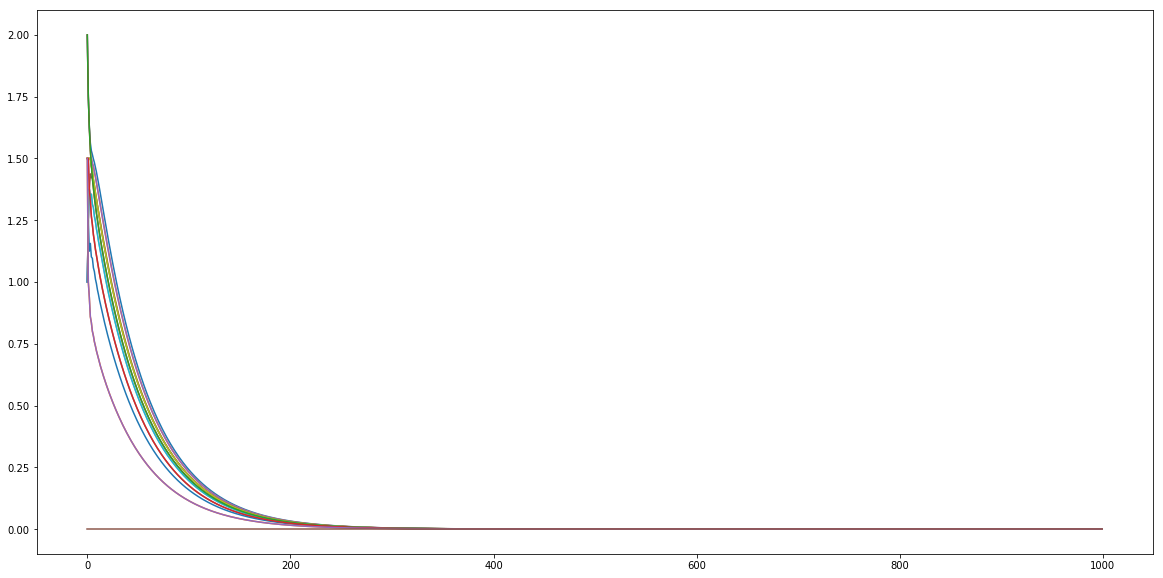

In [160]:
plt.figure(figsize=(20, 10))
plt.plot(deltas)

In [161]:
arr=np.array([[-100 for i in range(6)]for j in range(6)])
arr[1:5,1:5]=valueMap[:,:]
arr
    

array([[-100, -100, -100, -100, -100, -100],
       [-100,  -89,  -85,  -80,  -77, -100],
       [-100,  -85,  -79,  -72,  -66, -100],
       [-100,  -80,  -72,  -59,  -43, -100],
       [-100,  -77,  -66,  -43,    0, -100],
       [-100, -100, -100, -100, -100, -100]])

In [162]:
start=[1,1]
cur_state=[1,1]
path=[]
while(cur_state[0]!=4 and cur_state[1]!=4):
    mini=arr[cur_state[0],cur_state[1]]-arr[cur_state[0],cur_state[1]+1]
    flag=[cur_state[0],cur_state[1]+1]
    for action in actions:
        next_state=[cur_state[0]+action[0],cur_state[1]+action[1]] 
        if(arr[cur_state[0],cur_state[1]]-arr[next_state[0],next_state[1]]<mini):
            flag=next_state
    cur_state=flag
    path.append(flag)
    

In [163]:
path

[[1, 2], [2, 2], [2, 3], [3, 3], [3, 4]]

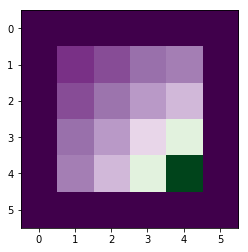

In [166]:



fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.imshow(arr, interpolation='nearest', cmap='PRGn')
plt.show()

In [167]:
for m in path:
    m[0]=m[0]-1
    m[1]=m[1]-1

In [168]:
path

[[0, 1], [1, 1], [1, 2], [2, 2], [2, 3]]

In [169]:
arr2=np.array([[0 for i in range(4)]for j in range(4)])
for state in states:
    if state in path:
        arr2[state[0],state[1]]=100
arr2[3,3]=200
arr2[0,0]=300
arr2

array([[300, 100,   0,   0],
       [  0, 100, 100,   0],
       [  0,   0, 100, 100],
       [  0,   0,   0, 200]])

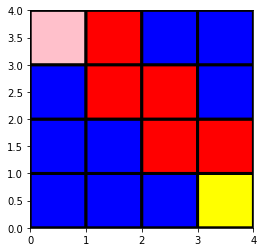

In [170]:

cmap = colors.ListedColormap(['Blue','red','yellow','pink'])
plt.figure(figsize=(4,4))
plt.pcolor(arr2[::-1],cmap=cmap,edgecolors='k', linewidths=3)
plt.show()